In [1]:
import pandas as pd
import numpy as np

In [32]:
X_train = pd.read_csv("training_v2.csv")
X_test = pd.read_csv("unlabeled.csv")

#X_train['label'] = 'train'
#X_test['label'] = 'test'


X_train.drop(['hospital_id', 'patient_id', 'icu_id', 'readmission_status'], inplace=True, axis=1)
X_test.drop(['hospital_id', 'patient_id', 'icu_id', 'readmission_status', 'hospital_death'], 
inplace=True, axis=1)


print(X_train.shape)
print(X_test.shape)

(91713, 182)
(39308, 181)


In [33]:
X_train["height"] = np.where((X_train.height.isna() & (X_train.gender == 'F')), 160, X_train["height"])
X_train["height"] = np.where((X_train.height.isna() & (X_train.gender == 'M')), 180, X_train["height"])
X_train["height"] = np.where((X_train.height.isna() & (X_train.gender.isna())), 170, X_train["height"])
X_train["weight"] = np.where((X_train.height.isna() & (X_train.gender == 'F')), 65, X_train["weight"])
X_train["weight"] = np.where((X_train.height.isna() & (X_train.gender == 'M')), 82, X_train["weight"])
X_train["weight"] = np.where((X_train.height.isna() & (X_train.gender.isna())), 74, X_train["weight"])

In [34]:
X_test["height"] = np.where((X_test.height.isna() & (X_test.gender == 'F')), 160, X_test["height"])
X_test["height"] = np.where((X_test.height.isna() & (X_test.gender == 'M')), 180, X_test["height"])
X_test["height"] = np.where((X_test.height.isna() & (X_test.gender.isna())), 170, X_test["height"])
X_test["weight"] = np.where((X_test.height.isna() & (X_test.gender == 'F')), 65, X_test["weight"])
X_test["weight"] = np.where((X_test.height.isna() & (X_test.gender == 'M')), 82, X_test["weight"])
X_test["weight"] = np.where((X_test.height.isna() & (X_test.gender.isna())), 74, X_test["weight"])

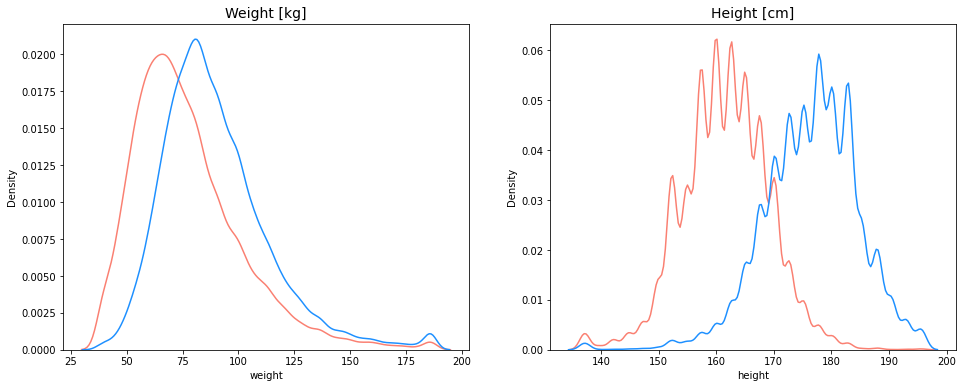

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt

# Plot univariate or bivariate distributions using kernel density estimation.
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations 
# in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density 
# curve in one or more dimensions.

# some data exploration for the weight and height 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.kdeplot(X_train[X_train.gender == 'F'].weight, label='Female', color='salmon', ax=ax[0])
sns.kdeplot(X_train[X_train.gender == 'M'].weight, label='Male', color='dodgerblue', ax=ax[0])
ax[0].set_title('Weight [kg]', fontsize=14)

sns.kdeplot(X_train[X_train.gender == 'F'].height, label='Female', color='salmon', ax=ax[1])
sns.kdeplot(X_train[X_train.gender == 'M'].height, label='Male', color='dodgerblue', ax=ax[1])
ax[1].set_title('Height [cm]', fontsize=14)

plt.show()

In [35]:
lst = X_train.isna().sum() / len(X_train)

p = pd.DataFrame(lst)

# When we reset the index, the old index is added as a column, and a new sequential index is used
p.reset_index(inplace=True)

p.columns = ['a', 'b']
low_count = p[p['b'] > 0.4]

todelete = low_count['a'].values

X_train.drop(todelete, axis=1, inplace=True)
X_test.drop(todelete, axis=1, inplace=True)

X_train.shape

(91713, 108)

In [36]:
X_train.dropna(thresh=X_train.shape[1]/2, inplace=True)
X_train.shape

(91580, 108)

In [37]:
y_train = X_train['hospital_death']
X_train.drop('hospital_death', inplace=True, axis=1)

In [ ]:
X_traintest = pd.concat([X_train, X_test], keys=['x', 'y'])
X_traintest.shape

In [8]:
dictionary_ = pd.read_csv("WiDS Datathon 2020 Dictionary.csv")
print(dictionary_.shape)

(188, 6)


In [9]:
integer_cols = []
binary_cols = []
numeric_cols = []
string_cols = []

for i in range(dictionary_.shape[0]):
    if dictionary_.loc[i, 'Data Type'] == 'integer':
        integer_cols.append(dictionary_.loc[i, 'Variable Name'])

    if dictionary_.loc[i, 'Data Type'] == 'binary':
        binary_cols.append(dictionary_.loc[i, 'Variable Name'])

    if dictionary_.loc[i, 'Data Type'] == 'numeric':
        numeric_cols.append(dictionary_.loc[i, 'Variable Name'])

    if dictionary_.loc[i, 'Data Type'] == 'string':
        string_cols.append(dictionary_.loc[i, 'Variable Name'])


In [38]:
for col_name in string_cols:
    if col_name in X_train.columns.to_list():
        X_train[col_name].where(pd.notnull(X_train[col_name]), None, inplace=True)

    if col_name in X_test.columns.to_list():
        X_test[col_name].where(pd.notnull(X_test[col_name]), None, inplace=True)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

for col_name in string_cols:
    if col_name in X_train.columns.to_list():
        X_train[col_name] = enc.fit_transform(X_train[[col_name]])

    if col_name in X_test.columns.to_list():
        X_test[col_name] = enc.fit_transform(X_test[[col_name]])

In [ ]:
# separate train and test
train = X_train[X_traintest['label'] == 'train']
predict = X_traintest[X_traintest['label'] == 'test']

train.reset_index(inplace=True)
train.drop(['label'], inplace=True, axis=1)

predict.reset_index(inplace=True)
predict.drop(['label'], inplace=True, axis=1)

train = train.astype('float32')
predict = predict.astype('float32')

print(train.shape)
print(predict.shape)

In [40]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape)
print(X_test.shape)

(91580, 107)
(39308, 107)


In [41]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance', 
metric='nan_euclidean', copy=False)

knn_imputer.fit(X_train)

KNNImputer(copy=False, weights='distance')

In [42]:
knn_imputer.transform(X_train)
knn_imputer.transform(X_test)

array([[2.0000000e+00, 5.6000000e+01, 2.1102440e+01, ..., 0.0000000e+00,
        7.0000000e+00, 4.0000000e+00],
       [5.0000000e+00, 6.1099617e+01, 1.9500595e+01, ..., 0.0000000e+00,
        7.0000000e+00, 4.0000000e+00],
       [7.0000000e+00, 6.6000000e+01, 3.2518597e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3103900e+05, 7.1000000e+01, 2.3010380e+01, ..., 1.0000000e+00,
        9.0000000e+00, 0.0000000e+00],
       [1.3104100e+05, 5.7000000e+01, 3.2987949e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3105000e+05, 6.6000000e+01, 2.3183392e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [43]:
X_train.to_pickle("X_train.csv")
X_test.to_pickle("X_test.csv")
y_train.to_pickle("y_train.csv")

In [44]:
import pandas as pd

X_train = pd.read_pickle("X_train.csv")
y_train = pd.read_pickle("y_train.csv")
X_test = pd.read_pickle("X_test.csv")

In [ ]:
for col_name in numeric_cols:
    if col_name in X_traintest.columns.to_list():
        X_traintest[col_name] = X_traintest.groupby(['ethnicity', 'gender'], sort=False)[col_name].apply(
            lambda x: x.fillna(x.mean()))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_traintest = imputer.fit_transform(X_traintest) 

X_traintest = pd.DataFrame(X_traintest, columns=X_train.columns)

In [ ]:
def get_bmi_category(bmi):
    if bmi != bmi:  # NaN
        return np.nan
    elif bmi < 18.5:  # Underweight
        return 'Underweight'
    elif bmi < 25:  # Healthy weight
        return 'Healthy weight'
    elif bmi < 30:  # Overweight
        return 'Overweight'
    else:  # Obese
        return 'Obese'    
    
X_traintest["bmi_cat"] = X_traintest["bmi"].apply(get_bmi_category)

# value_counts() function returns a Series containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most 
# frequently-occurring element.
X_traintest["bmi_cat"] = X_traintest["bmi_cat"].fillna(X_traintest["bmi_cat"].value_counts().index[0])

def get_blood_pressure_category(sysbp, diasbp):
    if ((sysbp < 90) & (diasbp < 60)):
        return 1  # Low blood pressure
    elif ((sysbp < 120) & (diasbp < 80)):
        return 2  # Normal
    elif ((sysbp < 140) & (diasbp < 90)):
        return 3  # Pre-Hypertension
    elif ((sysbp < 160) & (diasbp < 100)):
        return 4  # Stage 1 Hypertension
    else:
        return 5  # Stage 2 Hypertension

X_traintest['bp_cat'] = X_traintest[['d1_sysbp_max', 'd1_diasbp_max']].apply(
    lambda x: get_blood_pressure_category(x.d1_sysbp_max, x.d1_diasbp_max), axis=1)

X_traintest["bp_cat"] = X_traintest["bp_cat"].fillna(X_traintest["bp_cat"].value_counts().index[0])


In [45]:
num_feature = []

for col_name in numeric_cols:
    if col_name in X_train.columns.to_list():
        num_feature.append(col_name)

In [46]:
# Create correlation matrix
corr_matrix = X_train[num_feature].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

X_train.drop(to_drop, inplace=True, axis=1)
X_test.drop(to_drop, inplace=True, axis=1)

print(X_train.shape)
print(X_test.shape)

(91580, 69)
(39308, 69)


<ipython-input-46-3bf3b48c019e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [47]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_jobs=-1)
yhat = iso.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1

np.unique(mask, return_counts=True)

(array([False,  True]), array([ 3222, 88358], dtype=int64))

In [48]:
X_train = X_train.loc[mask]
y_train = y_train.loc[mask]

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_train)

In [51]:
import plotly.express as px

fig = px.scatter(components, x=0, y=1, width=1000, height=1000)
fig.show()

In [ ]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.5)
yhat = ee.fit_predict(train)

mask = yhat != -1
len(mask)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=50, contamination=.05)
outliers = lof.fit_predict(X_train)
mask = outliers != -1
np.unique(outliers, return_counts=True)

In [52]:
y_train.value_counts() / len(y_train)

0    0.92828
1    0.07172
Name: hospital_death, dtype: float64

In [54]:
cat_feature = []

for i, col_name in enumerate(X_train.columns.to_list()):
    if col_name not in numeric_cols:
        cat_feature.append(i)

In [53]:
from sklearn.model_selection import train_test_split

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)
X_train11, X_train21, y_train11, y_train21 = train_test_split(X_train1, y_train1, test_size=0.5, 
stratify=y_train1)
X_train12, X_train22, y_train12, y_train22 = train_test_split(X_train2, y_train2, test_size=0.5, 
stratify=y_train1)

In [55]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=cat_feature)

X_train11, y_train11 = sm.fit_resample(X_train11, y_train11)

In [56]:
X_train21, y_train21 = sm.fit_resample(X_train21, y_train21)

In [57]:
X_train12, y_train12 = sm.fit_resample(X_train12, y_train12)

In [58]:
X_train22, y_train22 = sm.fit_resample(X_train22, y_train22)

In [59]:
print(y_train11.value_counts() / len(y_train11))
print(y_train21.value_counts() / len(y_train21))
print(y_train12.value_counts() / len(y_train12))
print(y_train22.value_counts() / len(y_train22))

0    0.5
1    0.5
Name: hospital_death, dtype: float64
0    0.5
1    0.5
Name: hospital_death, dtype: float64
0    0.5
1    0.5
Name: hospital_death, dtype: float64
0    0.5
1    0.5
Name: hospital_death, dtype: float64


In [60]:
X_train = pd.concat([X_train11, X_train21, X_train12, X_train22])
y_train = pd.concat([y_train11, y_train21, y_train12, y_train22])

print(X_train.shape)
print(y_train.shape)

(164042, 69)
(164042,)


In [61]:
from sklearn.preprocessing import MinMaxScaler

num_feature = []

for col_name in numeric_cols:
    if col_name in X_train.columns.to_list():
        num_feature.append(col_name)

X_train[num_feature] = MinMaxScaler().fit_transform(X_train[num_feature])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from metric_learn import NCA

y_tr = y
lf = NCA(n_components=2)
chosen_idx = np.random.choice(159001, size=1000)
X_X_trainmetric = train.iloc[chosen_idx, :]
y_X_trainmetric = y_tr.iloc[chosen_idx]
lf.fit(X_X_trainmetric, y_X_trainmetric)
X_transformed = lf.transform(X_X_trainmetric)
#print(X_transformed)

In [ ]:
cdict = {0: 'red', 1: 'blue'}
fig, ax = plt.subplots(figsize=(10,10))
print(np.unique(y_X_trainmetric))

for g in np.unique(y_X_trainmetric):
    ix = np.where(y_X_trainmetric == g)
    ax.scatter(X_transformed[ix,0], X_transformed[ix,1], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

In [ ]:
from sklearn.model_selection import X_traintest_split

X_train, X_test, y_train, y_test = X_traintest_split(train, y, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

sorted_idx = rf.feature_importances_.argsort()

In [ ]:
plt.figure(figsize=(12, 18))
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")